# Modell-Typen im Überblick

In diesem Notebook lernen wir verschiedene Typen von Large Language Models (LLMs) kennen und erkunden ihre spezifischen Eigenschaften und Anwendungsfälle.


## 1. LLM-Modelle im Vergleich

Wir beginnen mit einem Überblick der gängigsten LLM-Modelle und ihrer Eigenschaften.

In [1]:
from helpers import llm
import time

# Standard-Modell ist gpt-4o
standard_model = llm()

# Verschiedene Modelle im Vergleich
models = {
    "gpt-3.5-turbo": llm(model="gpt-3.5-turbo"),
    "gpt-4o": llm(model="gpt-4o"),
    "gpt-4o-mini": llm(model="gpt-4o-mini"),
}

test_prompt = "Erkläre mir das Konzept einer rekursiven Funktion in 2-3 Sätzen."

# Vergleich von Antwortzeiten und Qualität
for model_name, model_instance in models.items():
    print(f"\n--- Modell: {model_name} ---")
    start_time = time.time()
    response = model_instance.invoke(test_prompt)
    end_time = time.time()
    
    print(f"Antwort: {response.content}")
    print(f"Dauer: {end_time - start_time:.2f} Sekunden")


--- Modell: gpt-3.5-turbo ---
Antwort: Eine rekursive Funktion ist eine Funktion, die sich selbst aufruft, um eine Aufgabe zu lösen. Dabei wird das Problem in kleinere Teilprobleme unterteilt, die solange gelöst werden, bis ein Basisfall erreicht ist. Die rekursive Funktion kann dann ihre Ergebnisse kombinieren, um das Gesamtproblem zu lösen.
Dauer: 2.89 Sekunden

--- Modell: gpt-4o ---
Antwort: Eine rekursive Funktion ist eine Funktion, die sich selbst während ihrer Ausführung aufruft, um ein Problem in kleinere, leichter zu lösende Teilprobleme zu zerlegen. Dieser Prozess setzt sich fort, bis eine Basisbedingung erreicht wird, die das weitere Aufrufen der Funktion beendet und die Rekursion auflöst. Rekursive Funktionen sind besonders nützlich zur Lösung von Problemen, die sich natürlich in ähnliche Teilprobleme zerlegen lassen, wie zum Beispiel bei der Berechnung von Fibonacci-Zahlen oder der Durchführung von Traversierungen in Baumstrukturen.
Dauer: 2.23 Sekunden

--- Modell: gpt-4

## 2. Embeddings: Grundlagen und Anwendungen

Embeddings sind numerische Vektorrepräsentationen von Text, Bildern oder anderen Daten. Sie bilden semantische Eigenschaften in einem mehrdimensionalen Raum ab und sind fundamental für viele KI-Anwendungen.

In [2]:
import tiktoken

# Tokenisierung verstehen
encoding = tiktoken.encoding_for_model("gpt-4o")

example_text = "Künstliche Intelligenz verändert die Welt."
tokens = encoding.encode(example_text)
print(f"Text: '{example_text}'")
print(f"Token-IDs: {tokens}")

# Jeder Token einzeln dekodiert
decoded_tokens = [encoding.decode_single_token_bytes(token).decode("utf-8") for token in tokens]
print("\nToken für Token:")
for i, token in enumerate(decoded_tokens):
    print(f"Token {i+1}: '{token}'")

Text: 'Künstliche Intelligenz verändert die Welt.'
Token-IDs: [42, 43089, 9617, 4185, 160125, 89, 129213, 1076, 23079, 13]

Token für Token:
Token 1: 'K'
Token 2: 'ünst'
Token 3: 'liche'
Token 4: ' Int'
Token 5: 'elligen'
Token 6: 'z'
Token 7: ' verändert'
Token 8: ' die'
Token 9: ' Welt'
Token 10: '.'


## Embeddings mit OpenAI erzeugen und vergleichen

Embeddings ermöglichen es uns, semantische Ähnlichkeiten zwischen Texten zu berechnen. Wir werden einige Beispielsätze vergleichen.

In [1]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Text 1: Künstliche Intelligenz verändert die Welt
Text 2: KI revolutioniert alle Wirtschaftsbereiche
Text 3: Machine Learning ist ein Teilbereich der Künstlichen Intelligenz
Text 4: Katzen sind niedliche Haustiere
Text 5: Hunde werden oft als treue Begleiter bezeichnet
Text 6: Tiere spielen eine wichtige Rolle im Ökosystem


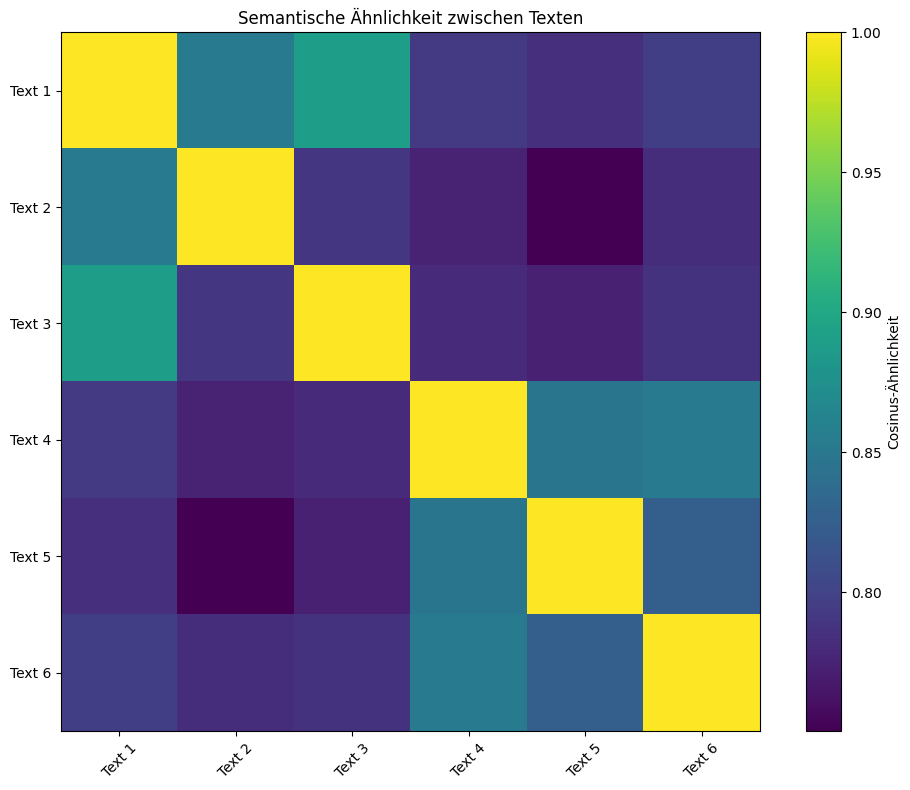

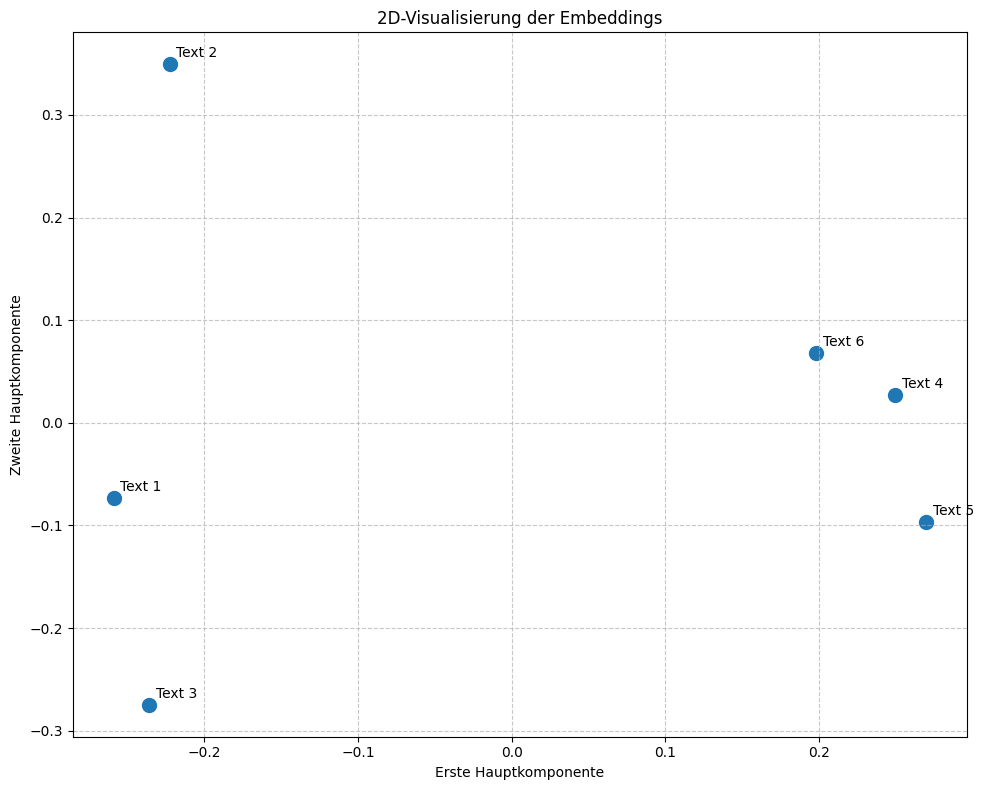

In [5]:
from openai import OpenAI
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

# Embeddings für verschiedene Sätze berechnen
texts = [
    "Künstliche Intelligenz verändert die Welt",
    "KI revolutioniert alle Wirtschaftsbereiche",
    "Machine Learning ist ein Teilbereich der Künstlichen Intelligenz",
    "Katzen sind niedliche Haustiere",
    "Hunde werden oft als treue Begleiter bezeichnet",
    "Tiere spielen eine wichtige Rolle im Ökosystem",
]

response = client.embeddings.create(
    input=texts,
    model="text-embedding-ada-002"
)

# Embeddings extrahieren
embeddings = [np.array(item.embedding) for item in response.data]

# Cosinus-Ähnlichkeit berechnen
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Ähnlichkeitsmatrix erstellen
similarity_matrix = np.zeros((len(texts), len(texts)))
for i in range(len(texts)):
    for j in range(len(texts)):
        similarity_matrix[i, j] = cosine_similarity(embeddings[i], embeddings[j])

# Visualisierung der Ähnlichkeitsmatrix
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='viridis')
plt.colorbar(label='Cosinus-Ähnlichkeit')
plt.xticks(range(len(texts)), [f"Text {i+1}" for i in range(len(texts))], rotation=45)
plt.yticks(range(len(texts)), [f"Text {i+1}" for i in range(len(texts))])
plt.title('Semantische Ähnlichkeit zwischen Texten')

# Beschriftung für die Texte
for i in range(len(texts)):
    print(f"Text {i+1}: {texts[i]}")

plt.tight_layout()
plt.show()

# Visualisierung mit PCA für 2D-Darstellung
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=100)

for i, (x, y) in enumerate(reduced_embeddings):
    plt.annotate(f"Text {i+1}", (x, y), xytext=(5, 5), textcoords='offset points')

plt.title('2D-Visualisierung der Embeddings')
plt.xlabel('Erste Hauptkomponente')
plt.ylabel('Zweite Hauptkomponente')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 3. Multimodale Modelle: Text und Bild

Multimodale Modelle können verschiedene Arten von Eingaben (Text, Bild, Audio) verarbeiten und miteinander verknüpfen. Hier ein Beispiel für die Arbeit mit Bildern in GPT-4o.

In [6]:
from langchain.schema import HumanMessage

# GPT-4o als multimodales Modell verwenden
vision_llm = llm(model="gpt-4o", max_tokens=1024)

# Beispiel: Bildanalyse mit einem Comic
input = [
    HumanMessage(
        content=[
            "Was ist auf diesem Bild zu sehen? Erkläre auch den Witz dahinter.",
            {"image_url": "https://joscha.com/data/media/cartoons/130608.png"},
        ]
    )
]

response = vision_llm.invoke(input)
print(response.content)

Das Bild zeigt eine Szene an einem Fotoautomaten. Eine Person warnt eine andere davor, den Automaten zu benutzen, weil auf seinen Fotos immer ein Elefant zu sehen ist. Dabei ragt tatsächlich ein Elefantenteil aus dem Vorhang des Fotoautomaten. Der Witz liegt darin, dass der Elefant, der eigentlich nicht in eine Fotokabine passt, sich offensichtlich darin versteckt und unerwartet auf den Fotos erscheint. Das ist eine humorvolle Visualisierung des Sprichworts "der Elefant im Raum", das oft für offensichtliche Probleme oder Fakten steht, die ignoriert werden.


## Praktische Anwendung: Bild generieren und analysieren

Wir kombinieren nun Text-zu-Bild-Generierung mit Bildanalyse, um den vollständigen multimodalen Kreislauf zu demonstrieren.

Optimierter DALL-E Prompt:
Erstelle ein Bild eines futuristischen Roboters in einer gemütlichen, traditionellen Bibliothek. Der Roboter sitzt an einem antiken Holztisch, umgeben von hohen Bücherregalen voller Bücher. Mit einer Hand hält er ein aufgeschlagenes Buch und liest, während seine andere Hand mit einem Stift in ein leeres Notizbuch schreibt. Der Roboter hat ein freundliches, konzentriertes Gesicht und seine Augen leuchten sanft in einem gedämpften, warmen Licht. Im Hintergrund sind weitere Bücher und eine große Uhr zu sehen, die eine ruhige und intellektuelle Atmosphäre schaffen.

Generiertes Bild: https://oaidalleapiprodscus.blob.core.windows.net/private/org-9YYJHbsKPes8UsB9wKVGKQ2A/user-NVbUprzP52eQh3kuvSmL7Mi5/img-8yLjZmXUwPQ5lRpFwi3H3m6G.png?st=2025-04-14T09%3A05%3A01Z&se=2025-04-14T11%3A05%3A01Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-04-14T03%3A03%3A32Z&ske=2025-04-15

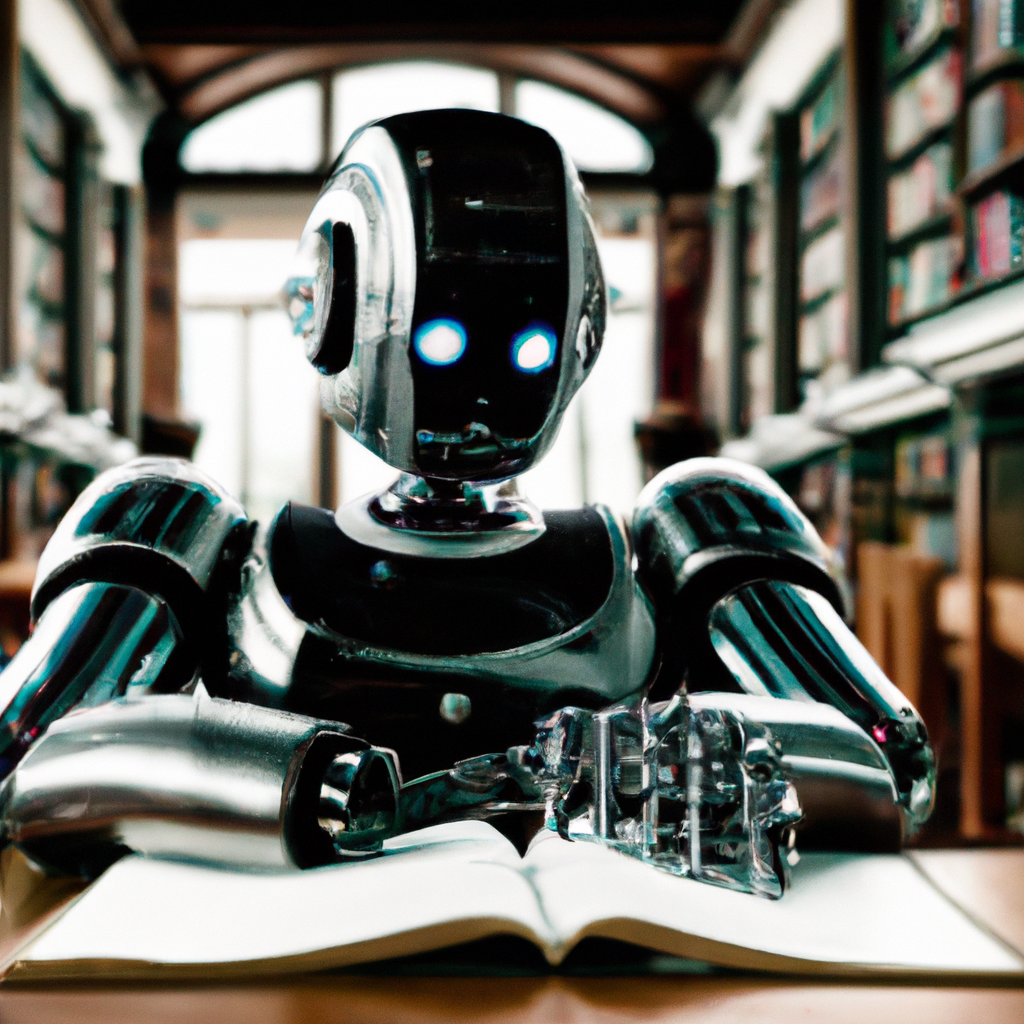


Analyse des generierten Bildes:
Das Bild zeigt einen Roboter in einer Bibliothek. Der Roboter hat ein futuristisches Design mit metallischen Oberflächen und leuchtenden blauen Augen. Er sitzt an einem Tisch, auf dem ein aufgeschlagenes Buch liegt. Der Fokus liegt auf dem Roboter, der das Buch betrachtet, was darauf hindeutet, dass er es liest.

Im Hintergrund sind Bücherregale zu sehen, die den Eindruck einer klassischen Bibliothek vermitteln. Der Roboter ist so positioniert, dass es aussieht, als ob er sowohl liest als auch möglicherweise Notizen macht oder schreibt, obwohl dies nicht explizit dargestellt ist.

Das Bild repräsentiert das Konzept 'Ein Roboter, der in einer Bibliothek sitzt und Bücher liest, während er gleichzeitig neue Bücher schreibt' teilweise gut. Der Aspekt des Lesens ist klar erkennbar, während das Schreiben eher angedeutet als offensichtlich ist.


In [7]:
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper
from langchain.schema import StrOutputParser
from langchain.prompts import ChatPromptTemplate, HumanMessagePromptTemplate
from IPython.display import Image, display
import requests
from io import BytesIO

# 1. Prompt für die Bildgenerierung erstellen
prompt = ChatPromptTemplate.from_messages(
    [
        HumanMessagePromptTemplate.from_template(
            "Generiere einen präzisen Prompt für DALL-E, um ein Bild zu erzeugen, das folgendes Konzept visualisiert: {image_desc}"
        )
    ]
)

# 2. Chain für die Prompt-Optimierung
chain = prompt | llm(temperature=0.7) | StrOutputParser()

# 3. Nutzereingabe für das Bild
user_image_description = "Ein Roboter, der in einer Bibliothek sitzt und Bücher liest, während er gleichzeitig neue Bücher schreibt"

# 4. Optimierten Prompt generieren
dalle_prompt = chain.invoke({"image_desc": user_image_description})
print(f"Optimierter DALL-E Prompt:\n{dalle_prompt}\n")

# 5. Bild mit DALL-E generieren
try:
    image_url = DallEAPIWrapper(model="dall-e-2", size="1024x1024").run(dalle_prompt)
    print(f"Generiertes Bild: {image_url}")
    
    # Bild herunterladen und anzeigen
    response = requests.get(image_url)
    img = Image(data=response.content)
    display(img)
    
    # 6. Bild mit GPT-4o analysieren
    vision_input = [
        HumanMessage(
            content=[
                "Beschreibe detailliert, was auf diesem Bild zu sehen ist. Wie gut repräsentiert es das Konzept: '" + user_image_description + "'?",
                {"image_url": image_url},
            ]
        )
    ]
    
    vision_response = vision_llm.invoke(vision_input)
    print("\nAnalyse des generierten Bildes:")
    print(vision_response.content)
    
except Exception as e:
    print(f"Fehler bei der Bildgenerierung oder -analyse: {e}")
    print("Um diesen Teil auszuführen, stellen Sie sicher, dass Sie einen gültigen DALL-E API-Schlüssel haben.")

## 4. Reranker für verbesserte Textsuche (optionales Thema)

Reranker verbessern die Qualität von Suchergebnissen durch eine präzisere Bewertung der Relevanz zwischen einer Anfrage und potenziellen Dokumenten.

In [8]:
# Beispiel-Code für Reranking mit Sentence Transformers
# Wenn Sie diesen Code ausführen möchten, installieren Sie: pip install sentence-transformers

try:
    from sentence_transformers import CrossEncoder
    
    # Beispiel-Dokumente
    documents = [
        "Berlin ist die Hauptstadt von Deutschland und hat etwa 3,7 Millionen Einwohner.",
        "Paris ist die Hauptstadt von Frankreich und ein beliebtes Reiseziel.",
        "Der Fluss Spree fließt durch Berlin und ist wichtig für die Stadt.",
        "Berlin hat viele Sehenswürdigkeiten wie das Brandenburger Tor.",
        "Deutschland grenzt an neun Nachbarländer in Europa."
    ]
    
    # Abfrage
    query = "Was ist die Hauptstadt von Deutschland?"
    
    print("Abfrage:", query)
    print("\nDokumente ohne Ranking:")
    for i, doc in enumerate(documents):
        print(f"{i+1}. {doc}")
    
    # Reranking mit einem Cross-Encoder
    reranker = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')
    pairs = [[query, doc] for doc in documents]
    scores = reranker.predict(pairs)
    
    # Ergebnisse sortieren
    ranked_results = sorted(zip(documents, scores), key=lambda x: x[1], reverse=True)
    
    print("\nDokumente nach Reranking:")
    for i, (doc, score) in enumerate(ranked_results):
        print(f"{i+1}. Score: {score:.4f} - {doc}")
        
except ImportError:
    print("Sentence Transformers nicht installiert. Bitte führen Sie 'pip install sentence-transformers' aus, um dieses Beispiel zu nutzen.")

Abfrage: Was ist die Hauptstadt von Deutschland?

Dokumente ohne Ranking:
1. Berlin ist die Hauptstadt von Deutschland und hat etwa 3,7 Millionen Einwohner.
2. Paris ist die Hauptstadt von Frankreich und ein beliebtes Reiseziel.
3. Der Fluss Spree fließt durch Berlin und ist wichtig für die Stadt.
4. Berlin hat viele Sehenswürdigkeiten wie das Brandenburger Tor.
5. Deutschland grenzt an neun Nachbarländer in Europa.


config.json:   0%|          | 0.00/845 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/732 [00:00<?, ?B/s]


Dokumente nach Reranking:
1. Score: 0.9996 - Berlin ist die Hauptstadt von Deutschland und hat etwa 3,7 Millionen Einwohner.
2. Score: 0.9977 - Paris ist die Hauptstadt von Frankreich und ein beliebtes Reiseziel.
3. Score: 0.0171 - Der Fluss Spree fließt durch Berlin und ist wichtig für die Stadt.
4. Score: 0.0002 - Deutschland grenzt an neun Nachbarländer in Europa.
5. Score: 0.0000 - Berlin hat viele Sehenswürdigkeiten wie das Brandenburger Tor.


## 5. Modellauswahl in der Praxis

Lassen Sie uns das LLM selbst nach Entscheidungskriterien für die Modellauswahl fragen.

In [9]:
from langchain.prompts import ChatPromptTemplate
from langchain.schema import StrOutputParser

# Prompt für Modellauswahl-Empfehlungen
model_selection_prompt = ChatPromptTemplate.from_messages([
    ("system", "Du bist ein erfahrener KI-Architekt, der Teams bei der Auswahl des richtigen LLM-Modells für ihre Anwendungen berät."),
    ("human", """
    Erstelle eine Entscheidungsmatrix für folgende Anwendungsfälle und empfehle das optimale Modell:
    
    1. Ein Chatbot für einfache Kundenanfragen auf einer E-Commerce-Website
    2. Ein System zur Analyse und Zusammenfassung wissenschaftlicher Fachartikel
    3. Eine Anwendung zur Analyse von Röntgenbildern mit begleitendem Befundtext
    4. Ein Tool für die automatische Codegenerierung für Entwickler
    5. Ein Übersetzungssystem für juristische Texte, das in einer Bank ohne Internetverbindung laufen soll
    
    Berücksichtige folgende Faktoren: Kosten, Leistung, Datenschutz, Multimodale Fähigkeiten und Integrationsaufwand.
    Strukturiere deine Antwort übersichtlich in Tabellenform und füge eine kurze Begründung für jede Empfehlung hinzu.
    """)
])

model_selection_chain = model_selection_prompt | llm() | StrOutputParser()
response = model_selection_chain.invoke({})
print(response)

Um die optimale Wahl für jedes der genannten Anwendungsfälle zu treffen, habe ich die relevanten Faktoren in einer Entscheidungsmatrix zusammengefasst. Die Modelle, die ich in Betracht ziehe, sind GPT-4, BERT, T5, DALL-E und ein spezifisches Modell für juristische Übersetzungen (z.B. ein spezialisiertes, lokal installiertes NMT-Modell). 

| Anwendungsfall                             | Modell     | Kosten | Leistung | Datenschutz | Multimodale Fähigkeiten | Integrationsaufwand | Begründung für Empfehlung               |
|--------------------------------------------|------------|--------|----------|-------------|-------------------------|---------------------|----------------------------------------|
| Chatbot für E-Commerce-Kundenanfragen      | GPT-4      | Mittel | Hoch     | Mittel      | Niedrig                 | Niedrig              | GPT-4 bietet exzellente Sprachfähigkeiten, ist kosteneffizient und lässt sich leicht integrieren. |
| Analyse wissenschaftlicher Fachartikel     | T5

## 6. Praktische Übungen

### Übung 1: Token-Analyse
Analysieren Sie, wie verschiedene Texte in Tokens zerlegt werden.

In [10]:
def analyze_tokens(text):
    encoding = tiktoken.encoding_for_model("gpt-4o")
    tokens = encoding.encode(text)
    decoded_tokens = [encoding.decode_single_token_bytes(token).decode("utf-8") for token in tokens]
    
    print(f"Text: '{text}'")
    print(f"Anzahl Tokens: {len(tokens)}")
    print("Tokens:")
    for i, token in enumerate(decoded_tokens):
        print(f"  {i+1}: '{token}'")
    print("\n")

# Beispiel
analyze_tokens("Künstliche Intelligenz ist faszinierend!")

# Übung: Analysieren Sie verschiedene Texte
# Beispiel 1: Fachbegriffe
analyze_tokens("Machine Learning und Deep Learning sind Teilbereiche der KI.")

# Beispiel 2: Sonderzeichen und Zahlen
analyze_tokens("Das kostet 123,45€ und ist verfügbar ab dem 01.01.2023!")

# Beispiel 3: Eigener Text (hier einfügen)
# analyze_tokens("Ihr eigener Text hier...")

Text: 'Künstliche Intelligenz ist faszinierend!'
Anzahl Tokens: 10
Tokens:
  1: 'K'
  2: 'ünst'
  3: 'liche'
  4: ' Int'
  5: 'elligen'
  6: 'z'
  7: ' ist'
  8: ' faszin'
  9: 'ierend'
  10: '!'


Text: 'Machine Learning und Deep Learning sind Teilbereiche der KI.'
Anzahl Tokens: 11
Tokens:
  1: 'Machine'
  2: ' Learning'
  3: ' und'
  4: ' Deep'
  5: ' Learning'
  6: ' sind'
  7: ' Teil'
  8: 'bereiche'
  9: ' der'
  10: ' KI'
  11: '.'


Text: 'Das kostet 123,45€ und ist verfügbar ab dem 01.01.2023!'
Anzahl Tokens: 20
Tokens:
  1: 'Das'
  2: ' kostet'
  3: ' '
  4: '123'
  5: ','
  6: '45'
  7: '€'
  8: ' und'
  9: ' ist'
  10: ' verfügbar'
  11: ' ab'
  12: ' dem'
  13: ' '
  14: '01'
  15: '.'
  16: '01'
  17: '.'
  18: '202'
  19: '3'
  20: '!'




### Übung 2: Embedding-Vergleich verschiedener Konzepte

Erstellen Sie Embeddings für verschiedene Konzepte und vergleichen Sie die Ähnlichkeiten.

Text 1: Maschinelles Lernen ist ein Teilgebiet der künstlichen Intelligenz
Text 2: Data Science umfasst Statistik, Programmierung und Domänenwissen
Text 3: Python ist eine beliebte Programmiersprache für KI-Anwendungen
Text 4: Neuronale Netze sind vom menschlichen Gehirn inspiriert


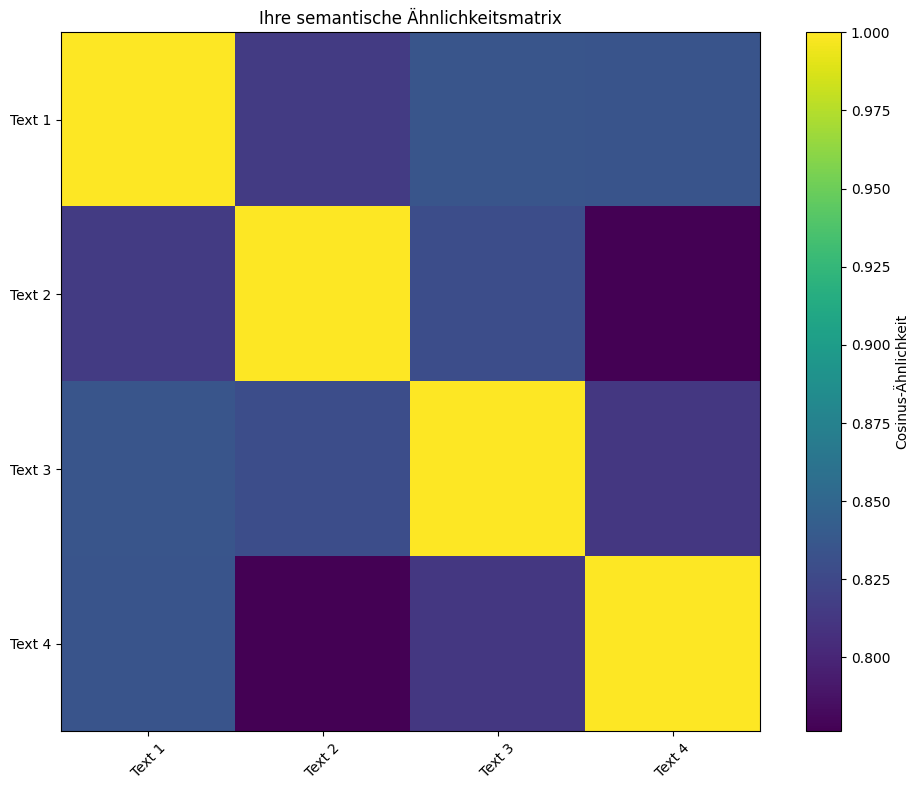

In [11]:
# Eigene Texte für Embedding-Vergleich definieren
your_texts = [
    # Fügen Sie hier 4-6 verschiedene Texte oder Konzepte ein
    # Beispiel:
    "Maschinelles Lernen ist ein Teilgebiet der künstlichen Intelligenz",
    "Data Science umfasst Statistik, Programmierung und Domänenwissen",
    "Python ist eine beliebte Programmiersprache für KI-Anwendungen",
    "Neuronale Netze sind vom menschlichen Gehirn inspiriert",
    # Fügen Sie weitere Texte hinzu...
]

# Embeddings berechnen (wenn OpenAI API verfügbar ist)
try:
    response = client.embeddings.create(
        input=your_texts,
        model="text-embedding-ada-002"
    )
    
    embeddings = [np.array(item.embedding) for item in response.data]
    
    # Ähnlichkeitsmatrix
    similarity_matrix = np.zeros((len(your_texts), len(your_texts)))
    for i in range(len(your_texts)):
        for j in range(len(your_texts)):
            similarity_matrix[i, j] = cosine_similarity(embeddings[i], embeddings[j])
    
    # Visualisierung
    plt.figure(figsize=(10, 8))
    plt.imshow(similarity_matrix, cmap='viridis')
    plt.colorbar(label='Cosinus-Ähnlichkeit')
    plt.xticks(range(len(your_texts)), [f"Text {i+1}" for i in range(len(your_texts))], rotation=45)
    plt.yticks(range(len(your_texts)), [f"Text {i+1}" for i in range(len(your_texts))])
    plt.title('Ihre semantische Ähnlichkeitsmatrix')
    
    # Textbeschreibungen
    for i, text in enumerate(your_texts):
        print(f"Text {i+1}: {text}")
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Fehler bei der Embedding-Berechnung: {e}")
    print("Stellen Sie sicher, dass die OpenAI API korrekt konfiguriert ist.")

## 7. Zusammenfassung

In diesem Notebook haben wir folgende Konzepte kennengelernt:

1. **Verschiedene LLM-Modelle** und ihre spezifischen Stärken und Schwächen
2. **Embeddings** als Vektorrepräsentationen von Text und ihre Anwendungen in semantischer Suche
3. **Multimodale Modelle** wie GPT-4o, die Text und Bilder verarbeiten können
4. **Reranker** zur Verbesserung von Suchergebnissen (optionales Thema)
5. **Praktische Entscheidungskriterien** für die Modellauswahl in realen Projekten

Diese Grundlagen bilden die Basis für fortgeschrittene KI-Anwendungen und geben einen Überblick über die vielfältigen Möglichkeiten moderner LLMs.